# Regression Analysis of House Prices: Exploration
A fun little project to get more familiar with various regression techniques. Goal is to predict the price of a house, given various input features. 
I love comparing and contrasting things, so I will implement different models and compare them against each other. As one ML model on its own is not illustrative of anything, and we always learn more when we compare many of them to each other...!

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import warnings


In [20]:
warnings.filterwarnings("ignore")

In [26]:
path = "/Users/rmyazdi/Documents/kaggle/house_prices/data/{fname}"
train = pd.read_csv(path.format(fname="train.csv"))
test = pd.read_csv(path.format(fname="test.csv"))

Let's see what features we have access to:

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Ok, that's a rather long list, let's explore a bit. I would think, having been on the market for buying a house and having considered various feature of a given property in order to give an offer, that basically all of these items would come into play. However, not all are significant drivers of the price. That is all to say, we should not be shy in dropping columns.

In [6]:
train.PoolQC[train.PoolQC.notnull()]

197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
Name: PoolQC, dtype: object

In [7]:
train.PoolArea[train.PoolArea > 0.1]

197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
Name: PoolArea, dtype: int64

I think it's a good idea to drop the columns with too few variables as they will not provide much information. For example, from the above we can see that there are only 7 properties with pools and that is not enough, in a data set of 1460 houses. Based on this though, the columns to drop are:
* PoolArea
* PoolQC
* MiscFeatures
* Alley

These are easy to remove simply because we can see how many non-null values are present in the dataset for them, which gives us a sense of the relative predominance of properties with such feature information.

<Axes: xlabel='OverallQual', ylabel='OverallCond'>

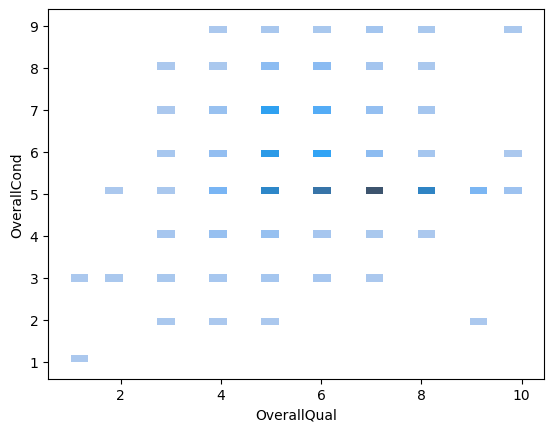

In [8]:
sns.histplot(data=train, x="OverallQual", y="OverallCond")

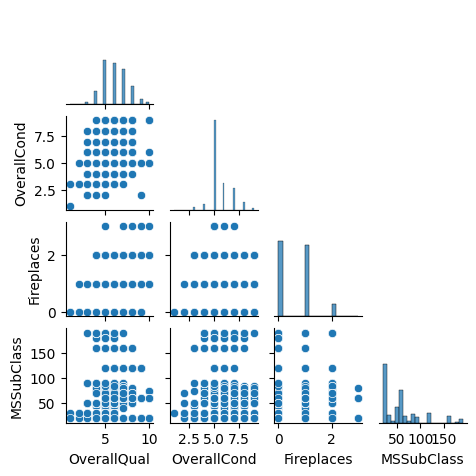

In [9]:
sns.pairplot(data=train, 
             x_vars=["OverallQual", "OverallCond", "Fireplaces", "MSSubClass"], 
             y_vars=["OverallQual", "OverallCond", "Fireplaces", "MSSubClass"], 
             corner=True,
            size=1.2)

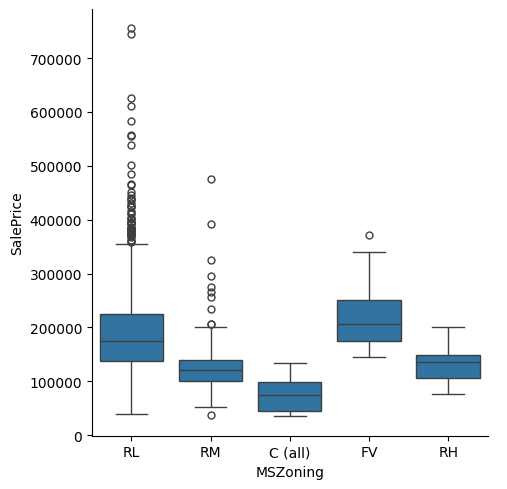

In [10]:
sns.catplot(data=train, x="MSZoning", y="SalePrice", kind="box")

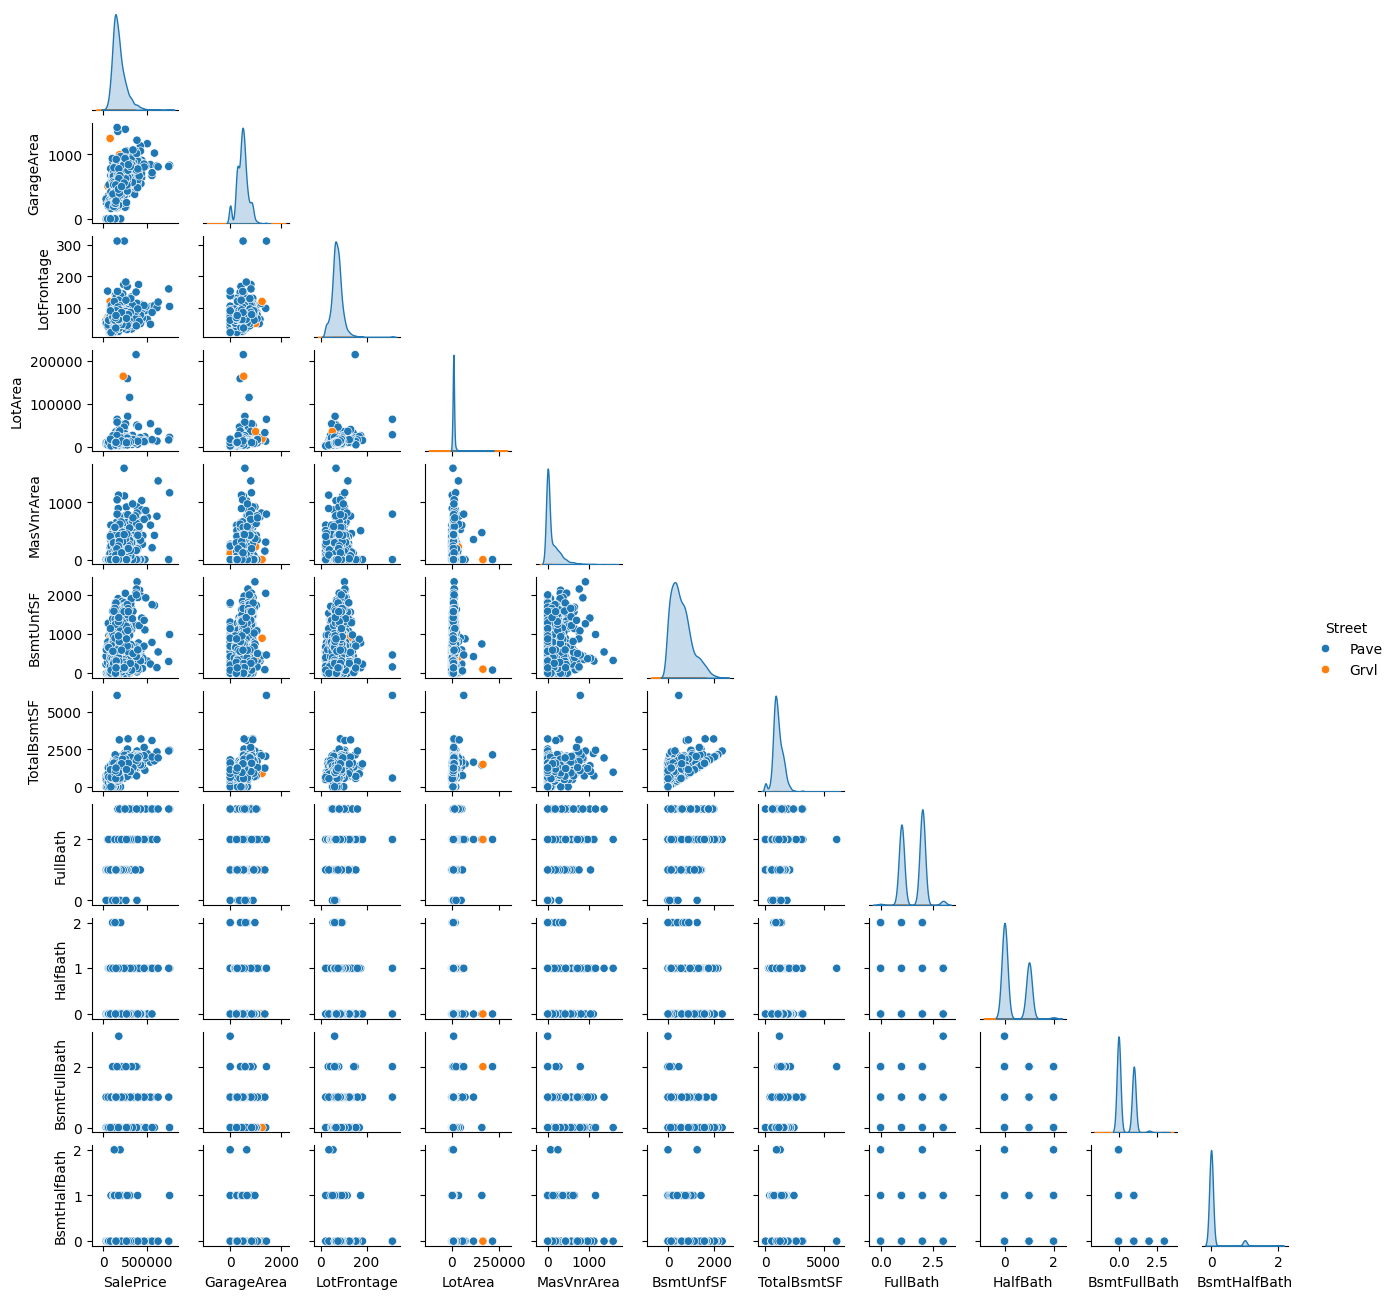

In [11]:
sns.pairplot(data=train, 
             x_vars=["SalePrice","GarageArea","LotFrontage", "LotArea", "MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"], 
             y_vars=["SalePrice","GarageArea","LotFrontage", "LotArea", "MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"], 
             corner=True,
             hue="Street",
            size=1.2)

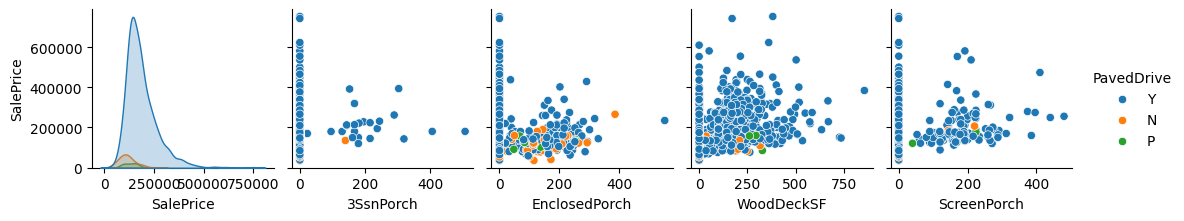

In [12]:
sns.pairplot(data=train, 
             y_vars=["SalePrice"], 
             x_vars=["SalePrice","3SsnPorch","EnclosedPorch", "WoodDeckSF", "ScreenPorch"],
             hue="PavedDrive",
             corner=False,
            size=2.2)

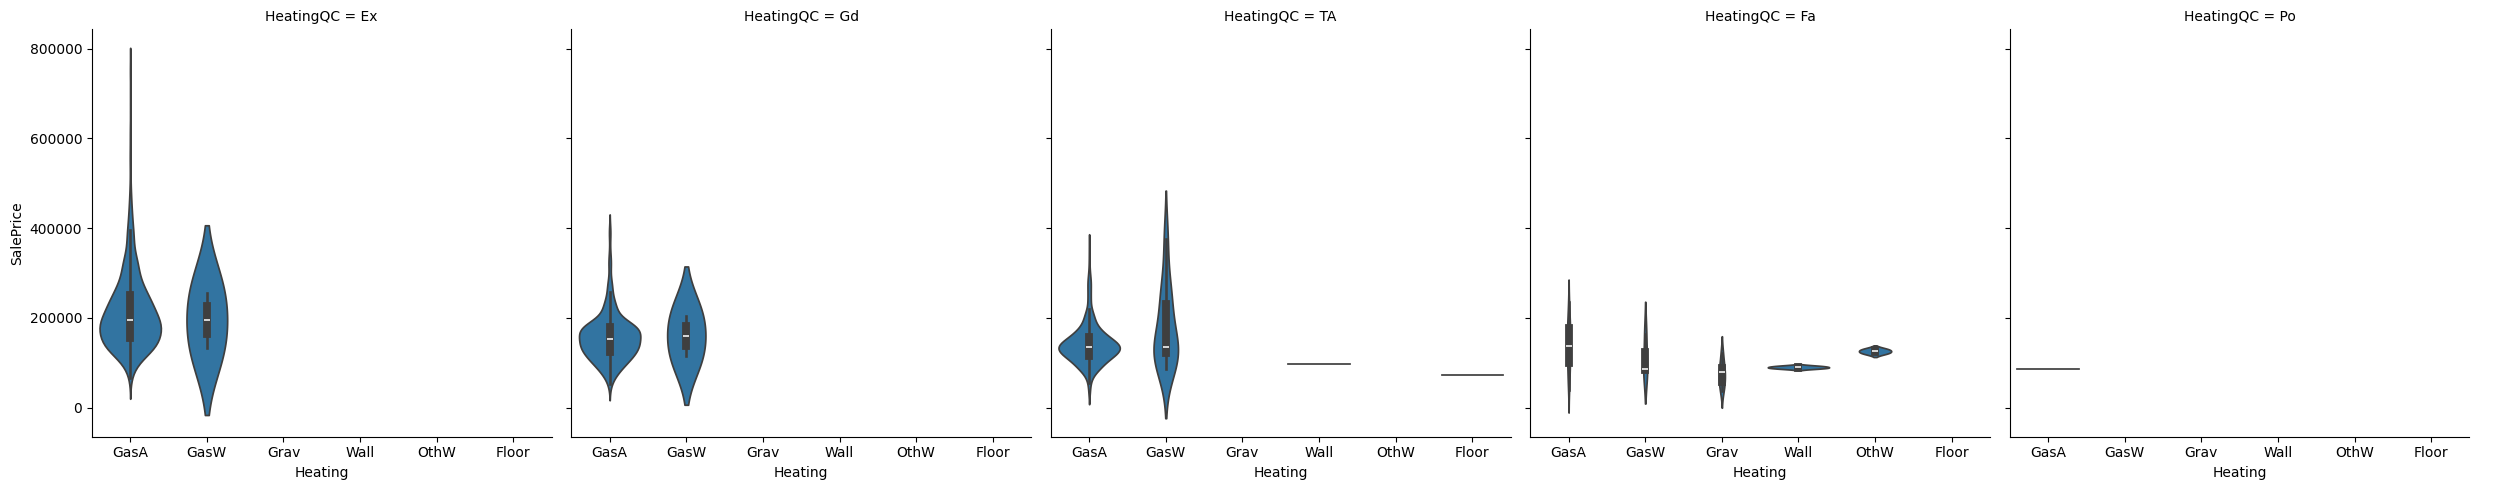

In [14]:
sns.catplot(data=train, x="Heating", y="SalePrice", kind="violin", col="HeatingQC")

In [ ]:
sns.catplot(data=train, x="CentralAir", y="SalePrice", kind="violin")

In [ ]:
sns.catplot(data=train, x="GarageFinish", y="SalePrice",kind="violin", hue="LotShape")

In [ ]:
sns.catplot(data=train, x="Utilities", y="SalePrice",kind="violin", hue="LotShape")

In [ ]:
sns.catplot(data=train, x="LandSlope", y="SalePrice",kind="violin", hue="HouseStyle", col="BldgType")

In [ ]:
sns.pairplot(data=train, x_vars=["SalePrice","YearBuilt", "YearRemodAdd", "YrSold"], 
             y_vars=["SalePrice", "YearBuilt", "YearRemodAdd", "YrSold"],
             corner=True, size=1.2)

In [ ]:
facet_grid = sns.catplot(data=train, x="Neighborhood", y="SalePrice",kind="box")
facet_grid.set_xticklabels(rotation=56)

In [ ]:
tmp = train.groupby("Neighborhood")
obj = tmp.agg({'SalePrice': [np.min,np.max,np.mean]})

In [ ]:
obj.sort_values(('SalePrice', 'min'))

## Notes and Comments

What was learned from all the above?
1. Lot Area, Basement information, porch information are very important
2. There are a lot of categorical features. One-hot-encoding would be quite demanding, storage-wise.
3. Columns with too few actual data points --> drop them. No need to over-complicate the model. 

In [22]:
my_test = train[[col for col in train if "Bsmt" in col]]

In [23]:
my_test

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,706,Unf,0,150,856,1,0
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,0,1
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1,0
3,TA,Gd,No,ALQ,216,Unf,0,540,756,1,0
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,0,Unf,0,953,953,0,0
1456,Gd,TA,No,ALQ,790,Rec,163,589,1542,1,0
1457,TA,Gd,No,GLQ,275,Unf,0,877,1152,0,0
1458,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,1,0


In [34]:
df = train.select_dtypes('object')
columns = sort(df.columns
for col in df:
    
    print(f"{col=} ==> {df[col].unique()}")

col='MSZoning' ==> ['RL' 'RM' 'C (all)' 'FV' 'RH']
col='Street' ==> ['Pave' 'Grvl']
col='Alley' ==> [nan 'Grvl' 'Pave']
col='LotShape' ==> ['Reg' 'IR1' 'IR2' 'IR3']
col='LandContour' ==> ['Lvl' 'Bnk' 'Low' 'HLS']
col='Utilities' ==> ['AllPub' 'NoSeWa']
col='LotConfig' ==> ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
col='LandSlope' ==> ['Gtl' 'Mod' 'Sev']
col='Neighborhood' ==> ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
col='Condition1' ==> ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
col='Condition2' ==> ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
col='BldgType' ==> ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
col='HouseStyle' ==> ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
col='RoofStyle' ==> ['Gable' 'Hip' 'Gambrel' 'Man

In [35]:
train.GarageYrBlt

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [38]:
train[train["GarageYrBlt"].isna()].GarageYrBlt

39     NaN
48     NaN
78     NaN
88     NaN
89     NaN
        ..
1349   NaN
1407   NaN
1449   NaN
1450   NaN
1453   NaN
Name: GarageYrBlt, Length: 81, dtype: float64